# Data Preprocessing

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("titanic.csv")

In [22]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [23]:
#unecessary feature removal
df.drop(["PassengerId","Name", "Ticket","Cabin","Embarked"], axis = 1, inplace = True)

In [24]:
#check for null values
df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 23.0+ KB


In [26]:
#handling missing values
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values= np.NaN, strategy='mean')

missing_value_columns = ['Age', 'Fare']
df[missing_value_columns]=imp_mean.fit_transform(df[missing_value_columns])

In [27]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [28]:
#checking for non numerical features
for column in df.columns:
    if df[column].dtype == object:
        print(column)

Sex


In [29]:
#one hot encoding the categorical features into numerical 
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

In [30]:
cols = ['Sex']
# for column in cols:
df2 = enc.fit(df[cols])

In [31]:
df2.categories_


[array(['female', 'male'], dtype=object)]

In [32]:
df = pd.get_dummies(df, columns = cols, dtype = float) 
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,34.50000,0,0,7.8292,0.0,1.0
1,1,3,47.00000,1,0,7.0000,1.0,0.0
2,0,2,62.00000,0,0,9.6875,0.0,1.0
3,0,3,27.00000,0,0,8.6625,0.0,1.0
4,1,3,22.00000,1,1,12.2875,1.0,0.0
...,...,...,...,...,...,...,...,...
413,0,3,30.27259,0,0,8.0500,0.0,1.0
414,1,1,39.00000,0,0,108.9000,1.0,0.0
415,0,3,38.50000,0,0,7.2500,0.0,1.0
416,0,3,30.27259,0,0,8.0500,0.0,1.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    418 non-null    int64  
 1   Pclass      418 non-null    int64  
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        418 non-null    float64
 6   Sex_female  418 non-null    float64
 7   Sex_male    418 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 26.3 KB


# Data Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

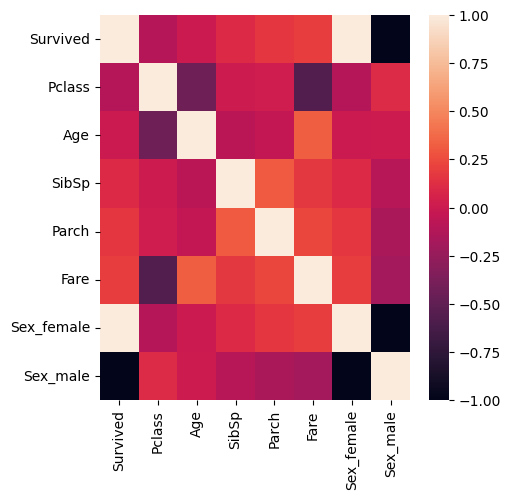

In [35]:
#checking correlation
corrmat = df.corr()
plt.figure(figsize= (5,5))
sns.heatmap(corrmat)
plt.show

# Modelling

In [36]:
target = df['Survived']
features = df.drop(['Survived'], axis=1)
target.shape, features.shape

((418,), (418, 7))

In [37]:
#scaling data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

features_scaled = min_max_scaler.fit_transform(features)
features_scaled

array([[1.        , 0.4527232 , 0.        , ..., 0.01528158, 0.        ,
        1.        ],
       [1.        , 0.61756561, 0.125     , ..., 0.01366309, 1.        ,
        0.        ],
       [0.5       , 0.8153765 , 0.        , ..., 0.01890874, 0.        ,
        1.        ],
       ...,
       [1.        , 0.50547277, 0.        , ..., 0.01415106, 0.        ,
        1.        ],
       [1.        , 0.39697468, 0.        , ..., 0.01571255, 0.        ,
        1.        ],
       [1.        , 0.39697468, 0.125     , ..., 0.0436405 , 0.        ,
        1.        ]])

In [38]:
#train test splitting data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(features_scaled, target, test_size=0.2, random_state=2212)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((334, 7), (84, 7), (334,), (84,))

In [39]:
#Comparing Different Models
from sklearn.pipeline import Pipeline
def prepare_model(algorithm, X_train, y_train): 
    model = Pipeline(steps=[('algorithm', algorithm)])
    model.fit(X_train, y_train)
    return model

In [40]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [41]:

algorithms = [RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(), 
              BaggingRegressor(), SVR(), DecisionTreeRegressor(), ExtraTreeRegressor(), 
              LinearRegression(), SGDRegressor(max_iter=2000), KNeighborsRegressor()]

In [42]:
names = []
times = []
mses = []
maes = []

for algorithm in algorithms:
    name = type(algorithm).__name__
    names.append(name)
    print(name)
    start_time = time.time()
    model = prepare_model(algorithm, X_train, y_train)
    pred = model.predict(X_test)
    end_time = time.time()
    print(end_time - start_time)
    times.append(end_time - start_time)
    mses.append(mean_squared_error(y_test, pred).astype(float))
    maes.append(round(mean_absolute_error(y_test, pred), 2))

RandomForestRegressor
0.12011909484863281
AdaBoostRegressor
0.0029916763305664062
GradientBoostingRegressor
0.07280802726745605
BaggingRegressor
0.025930404663085938
SVR
0.000997304916381836
DecisionTreeRegressor
0.00037860870361328125
ExtraTreeRegressor
0.0
LinearRegression
0.0016510486602783203
SGDRegressor
0.0012493133544921875
KNeighborsRegressor
0.006411314010620117


In [43]:
#result evaluation
results_dict = {'Algorithm': names, 'MSE': mses, 'MAE': maes, 'Time': times}
pd.DataFrame(results_dict).sort_values(by='MSE', ascending=1)

,Algorithm,MSE,MAE,Time
0,RandomForestRegressor,0.000000e+00,0.00,0.120119
1,AdaBoostRegressor,0.000000e+00,0.00,0.002992
3,BaggingRegressor,0.000000e+00,0.00,0.025930
5,DecisionTreeRegressor,0.000000e+00,0.00,0.000379
6,ExtraTreeRegressor,0.000000e+00,0.00,0.000000
9,KNeighborsRegressor,0.000000e+00,0.00,0.006411
7,LinearRegression,1.876773e-31,0.00,0.001651
2,GradientBoostingRegressor,1.804016e-10,0.00,0.072808
8,SGDRegressor,1.591482e-03,0.03,0.001249
4,SVR,5.355821e-03,0.07,0.000997


In [44]:
#As we got the random forest as the best performer for this dataset we will use it

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [45]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Dhruv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
123 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
104 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dhruv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dhruv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Dhruv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [46]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [47]:
#metrics evaluation of random forest regressor
from sklearn.metrics import accuracy_score

def evaluate(model, test_features, test_labels):
    predictions = np.round(model.predict(test_features))
    errors = abs(predictions - test_labels)
    accuracy = accuracy_score(test_labels, predictions)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = ')
    print(accuracy)
    
    return accuracy, predictions
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy, base_pred_train = evaluate(base_model,X_train, y_train)
print("test set")
base_test_accuracy, base_pred_test = evaluate(base_model,X_test, y_test)


Model Performance
Average Error: 0.0000 degrees.
Accuracy = 
1.0
test set
Model Performance
Average Error: 0.0000 degrees.
Accuracy = 
1.0


In [49]:
best_random = rf_random.best_estimator_
random_accuracy, random_pred_train = evaluate(best_random, X_train, y_train)
print("test set")
random_test_accuracy, random_pred_test = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 0.0000 degrees.
Accuracy = 
1.0
test set
Model Performance
Average Error: 0.0000 degrees.
Accuracy = 
1.0


### Even Though for the training dataset the model is providing 100% accuracy which leads to overfitting but at the same time the model also provides 100% accuracy for the test dataset so we can use it to predict 

In [51]:
from sklearn.metrics import confusion_matrix, precision_score

confusion_matrix(y_test, random_pred_test)

array([[47,  0],
       [ 0, 37]], dtype=int64)

In [54]:
#Dumping the model
import joblib
joblib.dump(best_random, 'Titanic_survivor.joblib')

['Titanic_survivor.joblib']